In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# Dimensions
no_of_sources=5
no_of_slots=4
P_total = 2.5
max_iters = 1000
snr=50  #from o to snr

In [127]:
# --- Random initialization ---
np.random.seed(3)
H = np.random.randn(no_of_slots, no_of_sources)
x = np.random.uniform(-1, 1, size=(no_of_sources, 1))  # Uniform distribution between -1 and 1
z = np.random.randn(no_of_slots, 1)



eta = 0.01           # learning rate for B
eta_lambda = 0.1     # learning rate for lambda
tol = 1e-6

In [ ]:
B = np.random.randn(no_of_slots, no_of_sources)  # Initial B value
# print("B=",B,"\n")
lambda_reg = 1.0      # Initial value of lambda

def norm(arr):
    return np.sum(arr * arr, axis=0)

for iter in range(max_iters):
    BH = B * H
    y = BH @ x +z  - np.sum(x)
    grad = 2 * (y @ x.T) * H + 2 * lambda_reg * B

    # Gradient step
    B_new = B - eta * grad
    colwise_norms = norm(B_new)

    print("norm=", colwise_norms, "\n")
    print((colwise_norms > P_total), "\n")

    # Make a copy to apply corrections 
    B_new1 = B_new.copy()

    # Check if any column has a squared norm greater than P_total
    if any(colwise_norms > P_total):      
        for i in range(B_new.shape[1]):  # Iterate over each column
            if colwise_norms[i] > P_total:
                scaling_factor = np.sqrt(P_total / colwise_norms[i])
                B_new1[:, i] *= scaling_factor
                print(norm(B_new1[:, i]) > P_total)  # Should print False

        # Dual update: Based on the total column norms exceeding P_total
        total_col_sum = np.sum(colwise_norms)
        lambda_reg += eta_lambda * (total_col_sum - P_total)
        lambda_reg = max(0, lambda_reg)

    # Convergence check
    if np.linalg.norm(B_new1 - B, ord='fro') < tol:
        print(f"Converged at iteration {iter}")
        break

    # Update B
    B = B_new1


norm= [1.85126913 6.2299237  2.04476502 4.30371942 6.89304692] 

[False  True False  True  True] 

True
True
False
norm= [1.64996484 2.16012776 1.81575073 2.14791417 2.22186786] 

[False False False False False] 

norm= [1.47080225 1.86717192 1.612489   1.84779383 1.97521082] 

[False False False False False] 

norm= [1.31133065 1.61459621 1.43207515 1.5918501  1.75643673] 

[False False False False False] 

norm= [1.16937207 1.39678739 1.27193328 1.37348133 1.56236614] 

[False False False False False] 

norm= [1.04299063 1.20892286 1.12977885 1.18708938 1.39018453] 

[False False False False False] 

norm= [0.93046557 1.04685765 1.00358564 1.02792461 1.23740026] 

[False False False False False] 

norm= [0.83026712 0.90702775 0.89155638 0.89195518 1.10180728] 

[False False False False False] 

norm= [0.74103524 0.7863675  0.79209681 0.77575673 0.9814522 ] 

[False False False False False] 

norm= [0.66156065 0.68223879 0.70379264 0.67641928 0.87460521] 

[False False False False Fal

In [129]:
# Function to compute MMSE for one round
def compute_mmse(B, H, x, snr_db):
    n = B.shape[0]
    BH = B * H
    signal = BH @ x
    P_signal = np.sum(x**2) / n
    snr_linear = 10 ** (snr_db / 10)
    P_noise = P_signal / snr_linear
    z = np.random.normal(0, np.sqrt(P_noise), size=(n, 1))
    y = signal + z
    target = np.sum(x)
    mmse = np.sum((y - target) ** 2) / n
    return mmse

In [130]:
snrs = np.arange(0, snr+1)
mmse_vals = []
for snr_db in snrs:
    mmse_list = [compute_mmse(B, H, x, snr_db) for _ in range(max_iters)]
    mmse_vals.append(np.mean(mmse_list))
    
print("mse",mmse_vals)

mse [0.4279962902306511, 0.3706486471742934, 0.34725202295066243, 0.3235363357821013, 0.28512888296387623, 0.2661457697206134, 0.2525586178895553, 0.24732549093405665, 0.22911779427863713, 0.22905763695945944, 0.22047915962062292, 0.21185274113857563, 0.20949797499835257, 0.20665643010572848, 0.20511788484656646, 0.2044304918360022, 0.19918926662100206, 0.1995752644914898, 0.1990456847587357, 0.1967837912891516, 0.19741981593510521, 0.19591004696480607, 0.19634323391689254, 0.19566629007069022, 0.1960831716207988, 0.195716649399304, 0.19458281018197404, 0.19545047197881343, 0.19558403431770227, 0.19536565477069456, 0.19485814758446365, 0.19487346270000933, 0.19469061315683148, 0.194779762150193, 0.19458211802311898, 0.1943702737802586, 0.19453135202856814, 0.19433996387066035, 0.19472255190966592, 0.19452295985142654, 0.1945730939621414, 0.19459900995491364, 0.19450509522925313, 0.19453253137539545, 0.19464416394159048, 0.1945938659475222, 0.19454362515529597, 0.19461440120309162, 0.19

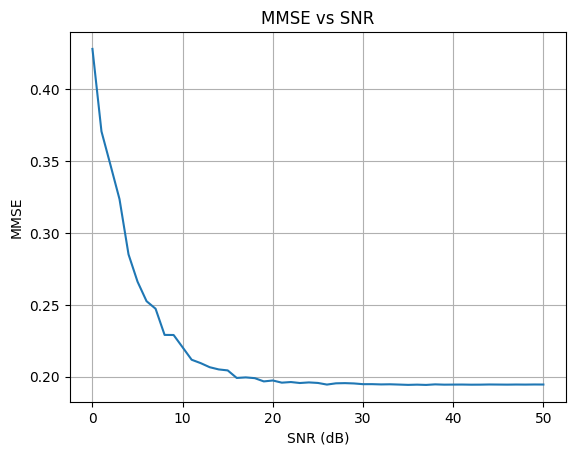

In [131]:
# Plot

plt.plot(snrs, mmse_vals)
plt.xlabel('SNR (dB)')
plt.ylabel('MMSE')
plt.title('MMSE vs SNR')
plt.grid(True)
plt.show()

[0.40888041 0.38196565 0.34714567 0.31863908 0.29160366 0.26794442
 0.25534329 0.24300063 0.23516697 0.2262182  0.22046318 0.21394329
 0.20933572 0.20709076 0.2054016  0.20291255 0.20106501 0.19927007
 0.19846825 0.19774976 0.19670455 0.1965577  0.19597319 0.1960309
 0.19582204 0.19546088 0.19524998 0.19520577 0.19546672 0.19526928
 0.19503242 0.19480741 0.19478128 0.19468416 0.19457738 0.19449458
 0.19441386 0.19453129 0.19452849 0.1946062  0.19456502 0.19455907
 0.19454555 0.1945606  0.19459019 0.19459389 0.19458396 0.19457704
 0.1946094  0.19460797 0.1946203 ]


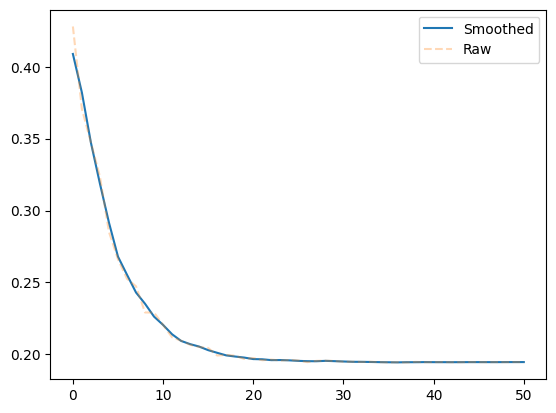

In [133]:
from scipy.ndimage import uniform_filter1d
mmse_vals_smoothed = uniform_filter1d(mmse_vals, size=3)

plt.plot(snrs, mmse_vals_smoothed, label="Smoothed")
plt.plot(snrs, mmse_vals, alpha=0.3, label="Raw", linestyle='--')
plt.legend()
print(mmse_vals_smoothed)